<a href="https://colab.research.google.com/github/annanya-mathur/Cardiovascular-Disease-Detection/blob/main/Predicting_Causes_for_CardioVasular_Disease_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb

In [3]:
from google.colab import files

In [4]:
uploaded=files.upload()

Saving Trained_cardio_data.xlsx to Trained_cardio_data.xlsx


In [8]:
dataframe=pd.read_excel("Trained_cardio_data.xlsx")
dataframe.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


In [10]:
dataframe.shape

(26, 13)

In [11]:
dataframe.isnull().values.any()                           # checking if there is a null value

False

In [12]:
dataframe.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
glucose        0
smoke          0
alcohol        0
active         0
cardio         0
dtype: int64

In [13]:
dataframe.describe()        # generating basic statistics

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,active,cardio
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,12.500000,19226.961538,1.384615,163.115385,73.038462,122.884615,79.807692,1.500000,1.230769,0.076923,0.038462,0.692308,0.269231
std,7.648529,2702.690622,0.496139,7.946455,15.644758,13.723926,11.178620,0.812404,0.587040,0.271746,0.196116,0.470679,0.452344
min,0.000000,14453.000000,1.000000,151.000000,45.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.250000,17476.000000,1.000000,157.000000,62.500000,110.000000,70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,12.500000,19317.500000,1.000000,162.500000,68.500000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,18.750000,21669.500000,2.000000,169.000000,82.750000,130.000000,88.750000,2.000000,1.000000,0.000000,0.000000,1.000000,0.750000
max,25.000000,23376.000000,2.000000,181.000000,112.000000,150.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Generating no. of patients having (1) cardiovasular diseases and no. who don't have (0)
dataframe['cardio'].value_counts()

0    19
1     7
Name: cardio, dtype: int64

Therefore, here 7 patients have cardiovascular disease acc. to dataset. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


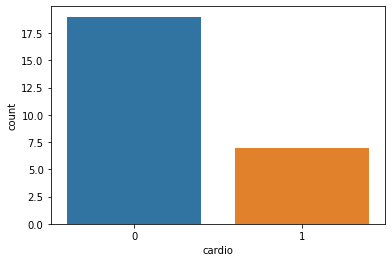

In [16]:
sb.countplot(dataframe['cardio'])

In [17]:
dataframe['years']=(dataframe['age']/365).round(0)
dataframe['years']=pd.to_numeric(dataframe['years'],downcast='integer')

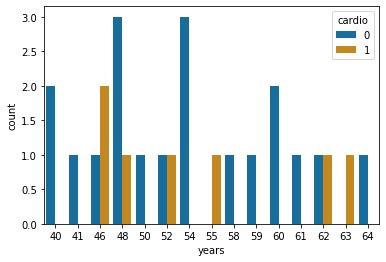

In [20]:
sb.countplot(x='years',hue='cardio',data=dataframe,palette='colorblind')

Here we can see no. of people having more risk are rising after the age of 46.

In [21]:
dataframe.corr()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,active,cardio,years
id,1.000000,-0.042864,-0.010541,-0.124715,-0.120174,0.080977,-0.045614,-0.196341,0.000000,0.153960,0.040000,0.211111,-0.156080,-0.029523
age,-0.042864,1.000000,-0.114567,-0.175927,0.061109,0.065468,-0.217203,0.186594,0.208252,-0.118017,-0.354309,0.169348,0.037275,0.999134
gender,-0.010541,-0.114567,1.000000,0.566600,0.101085,0.006778,0.085992,-0.297719,-0.042258,0.365148,0.252982,0.184466,0.054841,-0.113043
height,-0.124715,-0.175927,0.566600,1.000000,0.409228,0.292086,0.308713,-0.040274,0.019788,0.310625,0.459042,0.084734,0.291468,-0.172680
weight,-0.120174,0.061109,0.101085,0.409228,1.000000,0.427021,0.431180,0.259641,0.055615,0.046319,0.286313,0.077721,0.478920,0.054001
ap_hi,0.080977,0.065468,0.006778,0.292086,0.427021,1.000000,0.609961,0.565054,0.038192,0.045377,0.105747,0.328672,0.675314,0.071440
ap_lo,-0.045614,-0.217203,0.085992,0.308713,0.431180,0.609961,1.000000,0.297306,0.037510,0.005064,0.185965,0.216374,0.366620,-0.219687
cholesterol,-0.196341,0.186594,-0.297719,-0.040274,0.259641,0.565054,0.297306,1.000000,0.251618,-0.181186,-0.125529,0.104608,0.598662,0.197576
glucose,0.000000,0.208252,-0.042258,0.019788,0.055615,0.038192,0.037510,0.251618,1.000000,-0.115728,-0.080178,0.122495,0.208570,0.209614
smoke,0.153960,-0.118017,0.365148,0.310625,0.046319,0.045377,0.005064,-0.181186,-0.115728,1.000000,0.692820,0.192450,-0.175219,-0.109354


In [22]:
import matplotlib.pyplot as plt


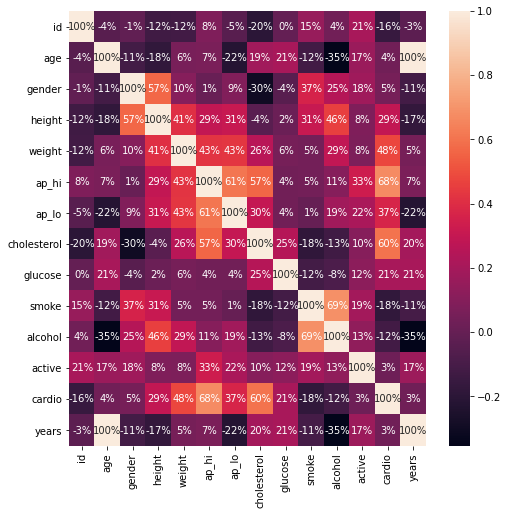

In [26]:
plt.figure(figsize=(8,8))
sb.heatmap(dataframe.corr(),annot=True,fmt='.0%')

Therefore, cholesterol has the biggest correlation with cardiovascular disease that is 60%. It is also affects by Age


In [34]:
datframe=dataframe.drop('id',axis=1)